<a href="https://colab.research.google.com/github/agungfradiansyah12/MesingLearning/blob/main/jb6MesinLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551812 sha256=e36dedd0b410e942af40d25e150094daccd38e7a3341be0f87e08edce18a8df0
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 11.2104 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1309 ms


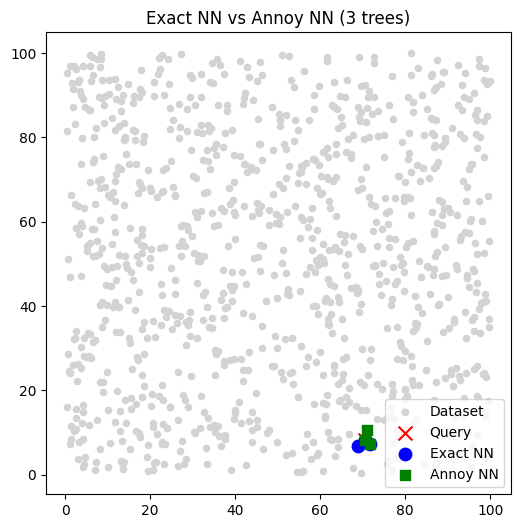

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

## Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan

a. Distance Metrics : Euclidean

Tree : 8

Jumlah Data : 1000

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5591 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.1965 ms


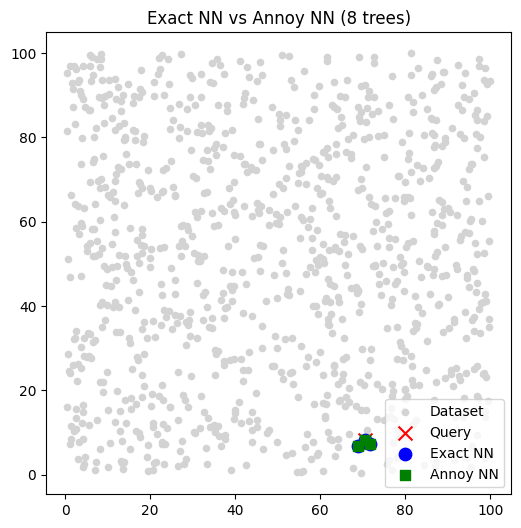

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # 8 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (8 trees)")
plt.show()

b. Distance Metrics : Euclidean

Tree : 3

Jumlah Data : 100,000

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 14.7693 ms

Annoy NN index: [64040, 64186, 88792]
Annoy NN jarak: [np.float64(0.0), np.float64(0.1579786703429142), np.float64(0.2533271079062769)]
Waktu Annoy: 0.1817 ms


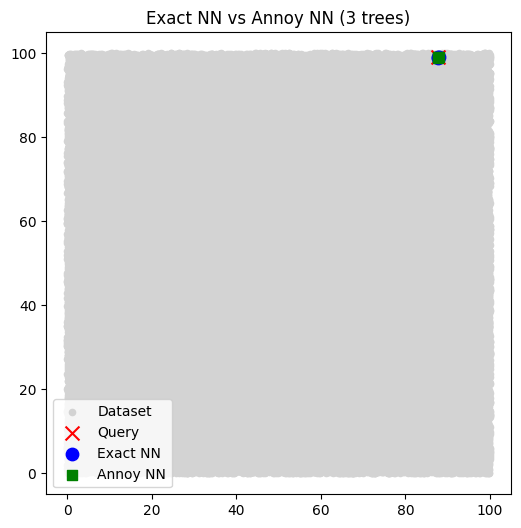

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

c. Distance Metrics : Angular

Tree : 3

Jumlah Data : 1000

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.7169 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.1185 ms


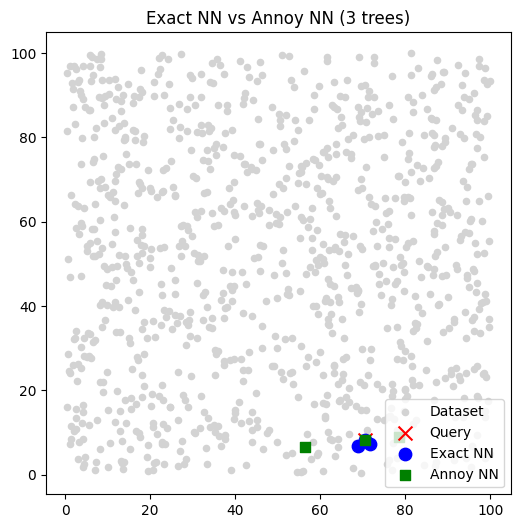

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

d. Distance Metrics : Angular

Tree : 8

Jumlah Data : 1000

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5445 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.1953 ms


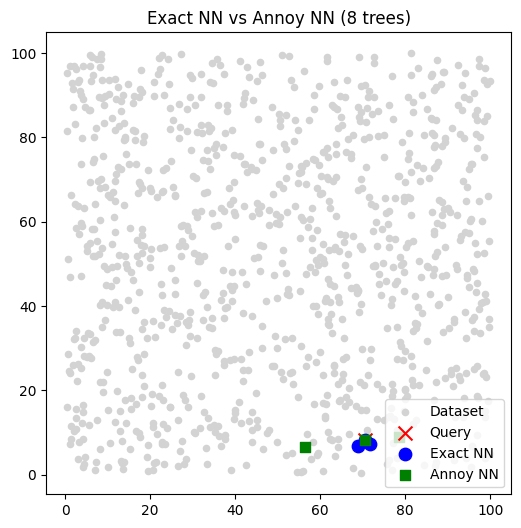

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # 8 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (8 trees)")
plt.show()

e. Distance Metrics : Angular

Tree : 3

Jumlah Data : 100,000

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 12.677 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak: [np.float64(0.0), np.float64(13.237907813420613), np.float64(54.73661775436655)]
Waktu Annoy: 0.1962 ms


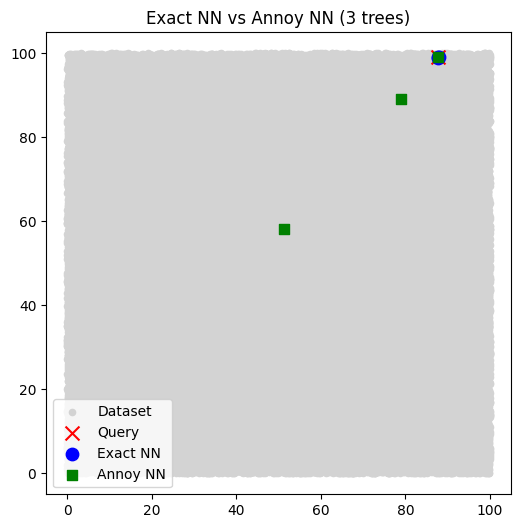

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

## Percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track)

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [49871271 39751185 16812493 31995553 45315203]
Exact NN time: 17.206 seconds


## Dari hasil diatas. Lakukan percobaan :

a. Distance Metrics : Euclidean

Tree : 8

Jumlah Data : 1000000

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [169705 406610 254946 715646 420210]
Exact NN time: 0.411 seconds
Annoy result: [3703, 390315, 694044, 646591, 825260]
Annoy time: 0.0 seconds


b. Distance Metrics : Angular

Tree : 8

Jumlah Data : 1000000

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [847790 783702 352905 132275 472158]
Exact NN time: 0.303 seconds
Annoy result: [783702, 635798, 996737, 249656, 582882]
Annoy time: 0.0 seconds


Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?

Jawab: Karena proses membangun indeks (build index) merupakan langkah awal yang hanya dilakukan sekali secara offline, sedangkan pencarian (query) dilakukan berkali-kali secara online dan membutuhkan waktu respon yang cepat.

# **Praktikum 2**

In [ ]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 33.0 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00011992454528808594
Waktu IVF+PQ: 0.00020647048950195312


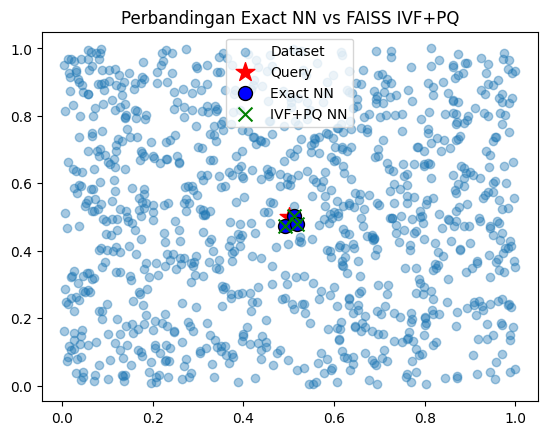

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


## Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.


=== Dataset: 1000 data, 2D ===
Exact NN waktu: 4.7e-05 detik
IVF+PQ waktu: 0.000115 detik

=== Dataset: 1000 data, 5D ===
Exact NN waktu: 2.8e-05 detik
IVF+PQ waktu: 0.000122 detik

=== Dataset: 1000000 data, 2D ===
Exact NN waktu: 0.010274 detik
IVF+PQ waktu: 0.000223 detik

=== Dataset: 1000000 data, 5D ===
Exact NN waktu: 0.015708 detik
IVF+PQ waktu: 0.000211 detik

=== Hasil Eksperimen ===
   Jumlah Data  Dimensi  Exact NN (detik)  IVF+PQ (detik)
0         1000        2          0.000047        0.000115
1         1000        5          0.000028        0.000122
2      1000000        2          0.010274        0.000223
3      1000000        5          0.015708        0.000211


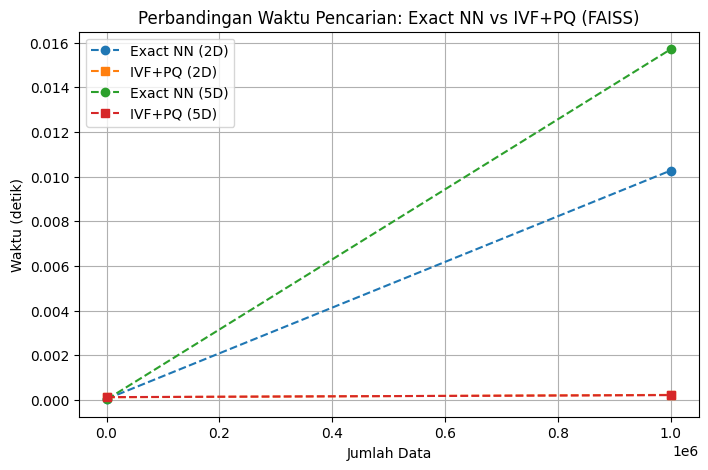

In [ ]:
import numpy as np
import faiss
import time
import pandas as pd
import matplotlib.pyplot as plt

# === Fungsi Eksperimen FAISS ===
def run_faiss_experiment(n_samples=1000, dim=2):
    print(f"\n=== Dataset: {n_samples} data, {dim}D ===")

    np.random.seed(42)
    X = np.random.rand(n_samples, dim).astype('float32')
    query = np.random.rand(1, dim).astype('float32')

    # --- Exact NN (Flat) ---
    index_flat = faiss.IndexFlatL2(dim)
    index_flat.add(X)

    start = time.time()
    D_flat, I_flat = index_flat.search(query, 3)
    time_flat = time.time() - start

    # --- Cari nilai m yang valid ---
    def get_valid_m(dim):
        # FAISS butuh dim % m == 0, dan biasanya m <= 8 agar efisien
        for x in range(1, dim+1):
            if dim % x == 0 and x <= 8:
                return x
        return 1

    m = get_valid_m(dim)

    # --- IVF + PQ (Approximate) ---
    nlist = 50  # jumlah cluster
    quantizer = faiss.IndexFlatL2(dim)
    index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)

    index_ivfpq.train(X)
    index_ivfpq.add(X)

    start = time.time()
    D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
    time_ivfpq = time.time() - start

    print("Exact NN waktu:", round(time_flat, 6), "detik")
    print("IVF+PQ waktu:", round(time_ivfpq, 6), "detik")

    return {
        "Jumlah Data": n_samples,
        "Dimensi": dim,
        "Exact NN (detik)": time_flat,
        "IVF+PQ (detik)": time_ivfpq
    }

# === Jalankan Eksperimen ===
results = []
for n in [1000, 1_000_000]:  # 1000 & 1 juta data
    for dim in [2, 5]:       # 2D & 5D
        results.append(run_faiss_experiment(n, dim))

# === Tampilkan Hasil Sebagai Tabel ===
df = pd.DataFrame(results)
print("\n=== Hasil Eksperimen ===")
print(df)

# === Visualisasi Hasil ===
plt.figure(figsize=(8,5))
for dim in [2, 5]:
    subset = df[df["Dimensi"] == dim]
    plt.plot(subset["Jumlah Data"], subset["Exact NN (detik)"], 'o--', label=f'Exact NN ({dim}D)')
    plt.plot(subset["Jumlah Data"], subset["IVF+PQ (detik)"], 's--', label=f'IVF+PQ ({dim}D)')

plt.xlabel("Jumlah Data")
plt.ylabel("Waktu (detik)")
plt.title("Perbandingan Waktu Pencarian: Exact NN vs IVF+PQ (FAISS)")
plt.legend()
plt.grid(True)
plt.show()

# **Praktikum 3**

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528143 sha256=cfedae7d87d83dc4a80003506b4b4893280f7d962a0a720e5ab310cefb3b74d7
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[418 485 811 788 447]]
Distances: [[0.01378977 0.01872855 0.0297473  0.03696938 0.03990706]]
Waktu: 0.05510210990905762 detik

=== HNSW ===
Indices: [[418 485 811 788 447]]
Distances: [[0.00019016 0.00035076 0.0008849  0.00136673 0.00159257]]
Waktu: 0.0001823902130126953 detik


## Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from tabulate import tabulate

# ==============================
# Fungsi Eksperimen
# ==============================
def run_experiment(num_elements, dim, metric):
    print(f"\n=== Dataset: {num_elements} data, {dim}D, Metric: {metric} ===")

    # Buat data acak
    data = np.random.random((num_elements, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)
    k = 5

    # -------------------------
    # Exact NN (Brute Force)
    # -------------------------
    nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric)
    nn.fit(data)

    start = time.time()
    distances_exact, indices_exact = nn.kneighbors(query)
    end = time.time()
    exact_time = end - start

    # -------------------------
    # HNSW
    # -------------------------
    p = hnswlib.Index(space=metric, dim=dim)
    p.init_index(max_elements=num_elements, ef_construction=100, M=16)
    p.add_items(data)
    p.set_ef(50)

    start = time.time()
    labels, distances_hnsw = p.knn_query(query, k=k)
    end = time.time()
    hnsw_time = end - start

    print(f"Exact NN waktu: {exact_time:.6f} detik")
    print(f"HNSW waktu: {hnsw_time:.6f} detik")

    return [num_elements, dim, metric, exact_time, hnsw_time]

# ==============================
# Jalankan Semua Percobaan
# ==============================
results = []
for n in [1000, 1_000_000]:
    for dim in [2, 5]:
        for metric in ['l2', 'cosine']:
            results.append(run_experiment(n, dim, metric))

# ==============================
# Tampilkan Tabel Hasil
# ==============================
headers = ["Jumlah Data", "Dimensi", "Metric", "Exact NN (detik)", "HNSW (detik)"]
print("\n=== Hasil Percobaan ===")
print(tabulate(results, headers=headers, floatfmt=".6f"))


=== Dataset: 1000 data, 2D, Metric: l2 ===
Exact NN waktu: 0.000754 detik
HNSW waktu: 0.000076 detik

=== Dataset: 1000 data, 2D, Metric: cosine ===
Exact NN waktu: 0.009301 detik
HNSW waktu: 0.000081 detik

=== Dataset: 1000 data, 5D, Metric: l2 ===
Exact NN waktu: 0.000654 detik
HNSW waktu: 0.000060 detik

=== Dataset: 1000 data, 5D, Metric: cosine ===
Exact NN waktu: 0.001216 detik
HNSW waktu: 0.000057 detik

=== Dataset: 1000000 data, 2D, Metric: l2 ===
Exact NN waktu: 0.010378 detik
HNSW waktu: 0.000075 detik

=== Dataset: 1000000 data, 2D, Metric: cosine ===
Exact NN waktu: 0.033302 detik
HNSW waktu: 0.000147 detik

=== Dataset: 1000000 data, 5D, Metric: l2 ===
Exact NN waktu: 0.013181 detik
HNSW waktu: 0.000108 detik

=== Dataset: 1000000 data, 5D, Metric: cosine ===
Exact NN waktu: 0.047871 detik
HNSW waktu: 0.000094 detik

=== Hasil Percobaan ===
  Jumlah Data    Dimensi  Metric      Exact NN (detik)    HNSW (detik)
-------------  ---------  --------  ------------------  ----

# **Praktikum 4**

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 30.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 31.708730697631836 detik
Query time: 0.0002474784851074219 detik
Neighbors: [840345, 468354, 315846, 280809, 75481] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.00816488265991211 detik
Query time: 0.0062448978424072266 detik
Neighbors: [840345 468354 315846 280809  75481] ...

=== HNSW (hnswlib) ===
Build time: 162.0569567680359 detik
Query time: 0.0003917217254638672 detik
Neighbors: [840345 468354 315846 280809  75481] ...


## Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib
from tabulate import tabulate

# =========================================
# Fungsi untuk menjalankan eksperimen
# =========================================
def run_experiment(metric, n_data=1_000_000, dim=5, k=10):
    print(f"\n=== Percobaan dengan Metric: {metric} ===")

    # -----------------------------
    # 1. Buat dataset acak
    # -----------------------------
    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    results = []

    # =============================
    # 2. Annoy
    # =============================
    ann_metric = 'angular' if metric == 'cosine' else 'euclidean'
    ann_index = AnnoyIndex(dim, ann_metric)

    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X[i])
    ann_index.build(10)  # jumlah pohon
    build_time = time.time() - start

    start = time.time()
    neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
    query_time = time.time() - start

    results.append(["Annoy", build_time, query_time])
    print("Annoy selesai")

    # =============================
    # 3. FAISS (Flat Index)
    # =============================
    if metric == 'cosine':
        # Normalisasi agar FAISS bisa pakai inner product untuk cosine
        Xn = X / np.linalg.norm(X, axis=1, keepdims=True)
        query_n = query / np.linalg.norm(query, axis=1, keepdims=True)
        faiss_index = faiss.IndexFlatIP(dim)
    else:
        faiss_index = faiss.IndexFlatL2(dim)
        Xn, query_n = X, query

    start = time.time()
    faiss_index.add(Xn)
    build_time = time.time() - start

    start = time.time()
    distances, indices = faiss_index.search(query_n, k)
    query_time = time.time() - start

    results.append(["FAISS", build_time, query_time])
    print("FAISS selesai")

    # =============================
    # 4. HNSW (hnswlib)
    # =============================
    hnsw_index = hnswlib.Index(space='cosine' if metric == 'cosine' else 'l2', dim=dim)
    start = time.time()
    hnsw_index.init_index(max_elements=n_data, ef_construction=100, M=16)
    hnsw_index.add_items(X)
    build_time = time.time() - start

    hnsw_index.set_ef(50)
    start = time.time()
    labels, distances = hnsw_index.knn_query(query, k=k)
    query_time = time.time() - start

    results.append(["HNSW", build_time, query_time])
    print("HNSW selesai")

    return results


# =========================================
# Jalankan percobaan pada 2 metric
# =========================================
final_results = []
for metric in ['l2', 'cosine']:
    res = run_experiment(metric, n_data=1_000_000, dim=5)
    for r in res:
        r.insert(0, metric)  # tambahkan kolom metric
        final_results.append(r)

# =========================================
# Tampilkan tabel hasil
# =========================================
headers = ["Metric", "Model", "Build Time (detik)", "Query Time (detik)"]
print("\n=== Hasil Percobaan ===")
print(tabulate(final_results, headers=headers, floatfmt=".6f"))


=== Percobaan dengan Metric: l2 ===
Annoy selesai
FAISS selesai
HNSW selesai

=== Percobaan dengan Metric: cosine ===
Annoy selesai
FAISS selesai
HNSW selesai

=== Hasil Percobaan ===
Metric    Model      Build Time (detik)    Query Time (detik)
--------  -------  --------------------  --------------------
l2        Annoy               23.536206              0.000127
l2        FAISS                0.008049              0.010576
l2        HNSW                84.931150              0.000122
cosine    Annoy               27.187886              0.000140
cosine    FAISS                0.012085              0.006185
cosine    HNSW                84.894512              0.000189


# **Praktikum 5**

In [ ]:
!pip install annoy faiss-cpu

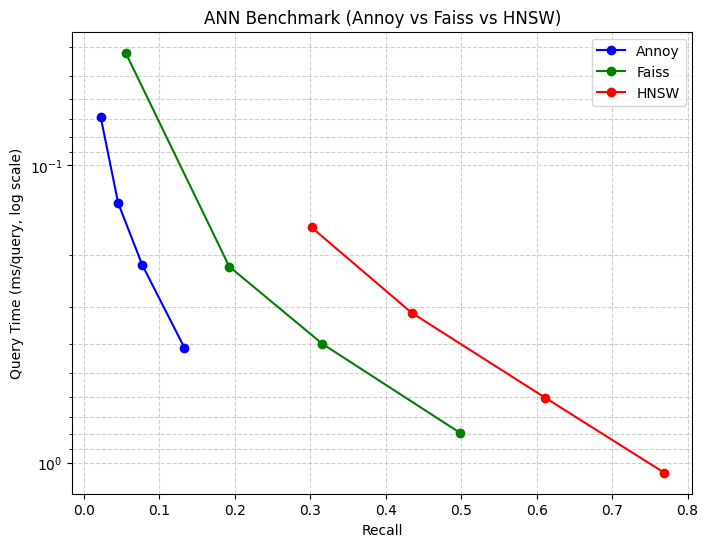

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# **Praktikum 6**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("\nGoogle Drive berhasil terhubung.")

Mounted at /content/drive

Google Drive berhasil terhubung.


In [ ]:
!pip install faiss-cpu annoy hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528146 sha256=6b18e78f4821690d55db2bbb0de07690b421c15731d9410c30950f67fbe17625
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [ ]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/ML/songs_with_attributes_and_lyrics.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_scaled.shape[1])
p_hnsw.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], nlist=100, metric=faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

# **Tugas**

In [ ]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

ModuleNotFoundError: No module named 'annoy'